Импортируем необходимые библиотеки

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

Открываем изображение и меняем его размер на 512x512 пикселей 

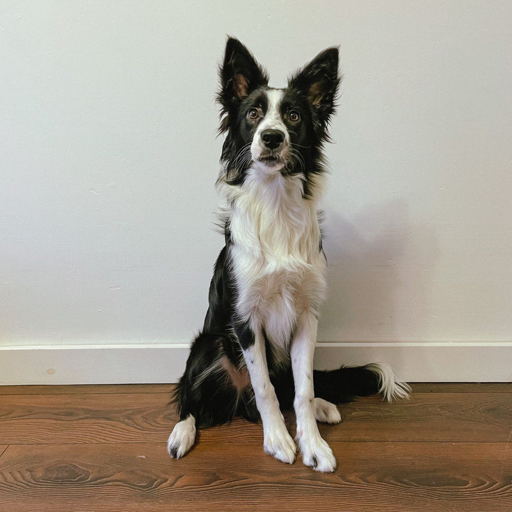

In [2]:
image_RGB = Image.open('ulm.jpg')
image_RGB = image_RGB.resize((512, 512))
image_RGB

Переведём изображение в матрицу и проверим её размерность. 
Ожидаем (512 пикселей в ширину)х(512 пикселей в высоту)х(3 значения RGB в каждом пикселе)

In [3]:
matr_RGB=np.array(image_RGB)
print(np.shape(matr_RGB))

(512, 512, 3)


Для простоты обработки переведём изображение из RGB в "оттенки серого"

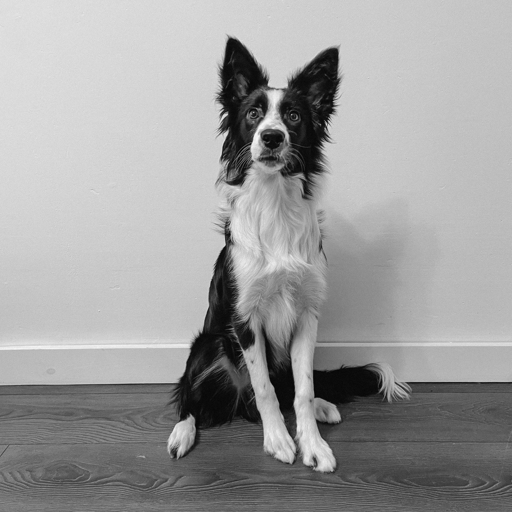

In [4]:
image_L=image_RGB.convert('L')
image_L

Переведём полученное изображение в матрицу и посмотрим на её размерность

In [5]:
matr_L=np.array(image_L)
print(np.shape(matr_L))

(512, 512)


Вычисляем производные по направлению

In [6]:
grad_z=np.gradient(matr_L)
dzdi=np.abs(grad_z[0])
dzdj=np.abs(grad_z[1])
matr_dz=(dzdi**2+dzdj**2)**0.5


Фильтруем матрицу производных по уровню threshold = 10

In [7]:
threshold = 10
dzdi_threshold = np.where(dzdi < threshold, 255, 0)
dzdj_threshold = np.where(dzdj < threshold, 255, 0)
matr_threshold = np.where(matr_dz < threshold, 255, 0)

Отобразим матрицы производных

(-0.5, 511.5, 511.5, -0.5)

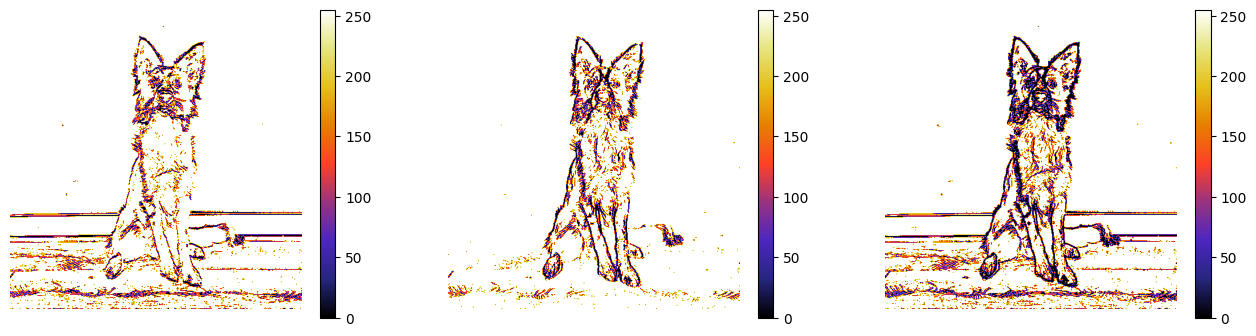

In [8]:
plt.figure(figsize=(16,4))
plt.subplot(131)
plt.imshow(dzdi_threshold,cmap='CMRmap')
plt.colorbar()
plt.axis('off')

plt.subplot(132)
plt.imshow(dzdj_threshold,cmap='CMRmap')
plt.colorbar()
plt.axis('off')

plt.subplot(133)
plt.imshow(matr_threshold,cmap='CMRmap')
plt.colorbar()
plt.axis('off')

Конвертируем матрицу в изображение и выведем с оригинальной картинкой

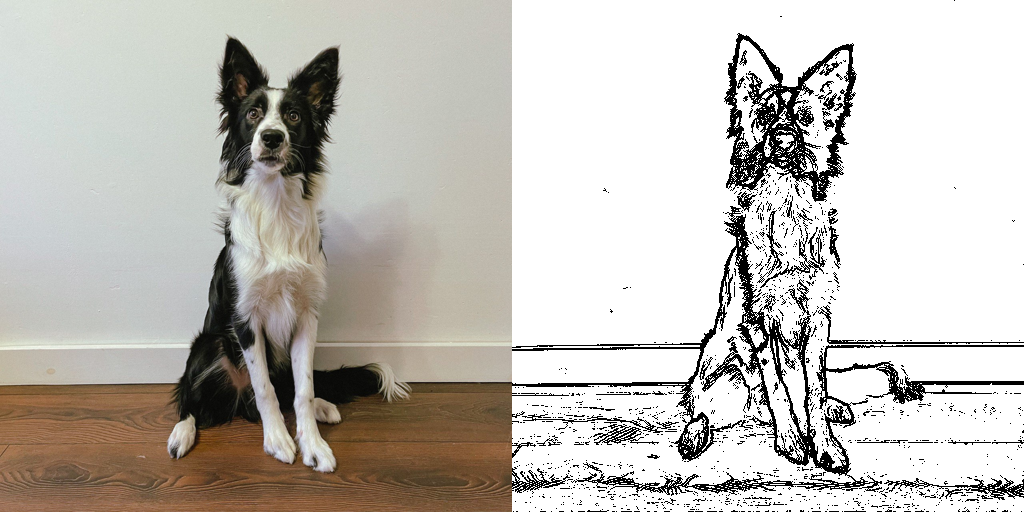

In [9]:
image_matr_threshold=Image.fromarray(matr_threshold).convert('L')
new_image = Image.new('RGB', (2*image_RGB.size[0],image_RGB.size[1]), (255,255,255))
new_image.paste(image_RGB,(0,0))
new_image.paste(image_matr_threshold,(image_RGB.size[0],0))
new_image